Gerando algumas visualizações no matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [4]:
colunas = {'pressão':'pressao', 'direção do vento':'direcao_vento',
          'velocidade do vento':'velocidade_vento'}

df.rename(mapper=colunas, axis=1, inplace=True)

In [5]:
df['data'] = pd.to_datetime(df['data'])

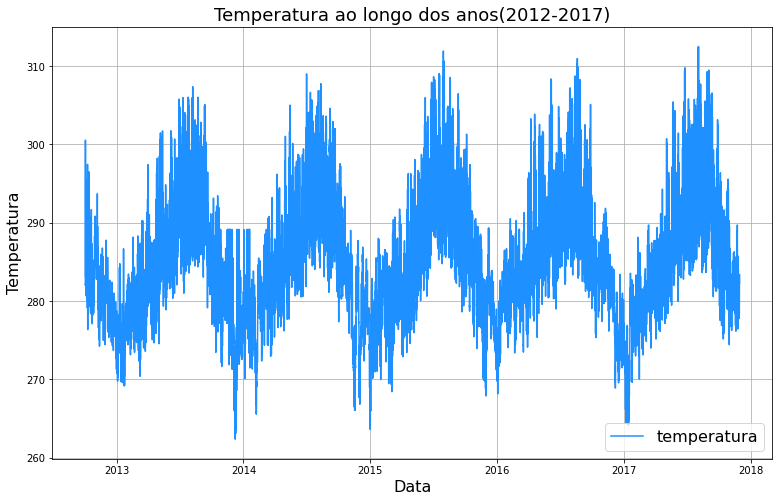

In [6]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo.set_title('Temperatura ao longo dos anos(2012-2017)', fontsize=18)
eixo.set_ylabel('Temperatura', fontsize=16)
eixo.set_xlabel('Data', fontsize=16)
eixo.legend(['temperatura'], loc='lower right', fontsize=16)
eixo.grid(True)

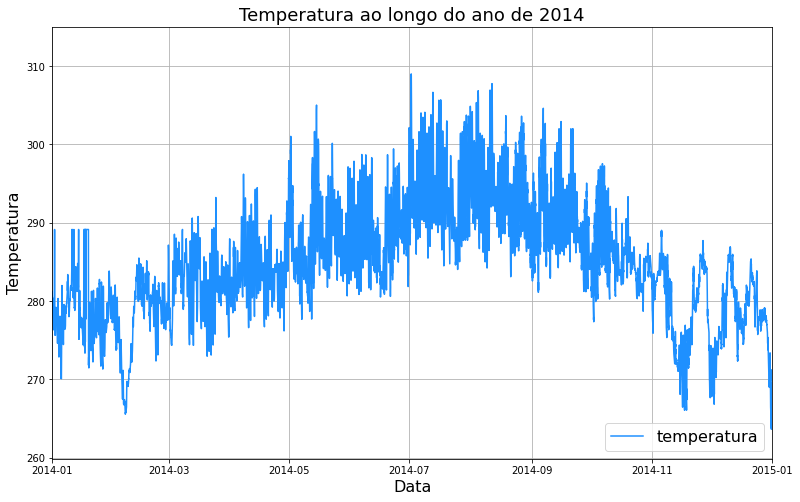

In [7]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo.set_title('Temperatura ao longo do ano de 2014', fontsize=18)
eixo.set_xlim(datetime(2014, 1, 1), datetime(2015, 1, 1))
eixo.set_ylabel('Temperatura', fontsize=16)
eixo.set_xlabel('Data', fontsize=16)
eixo.legend(['temperatura'], loc='lower right', fontsize=16)
eixo.grid(True)

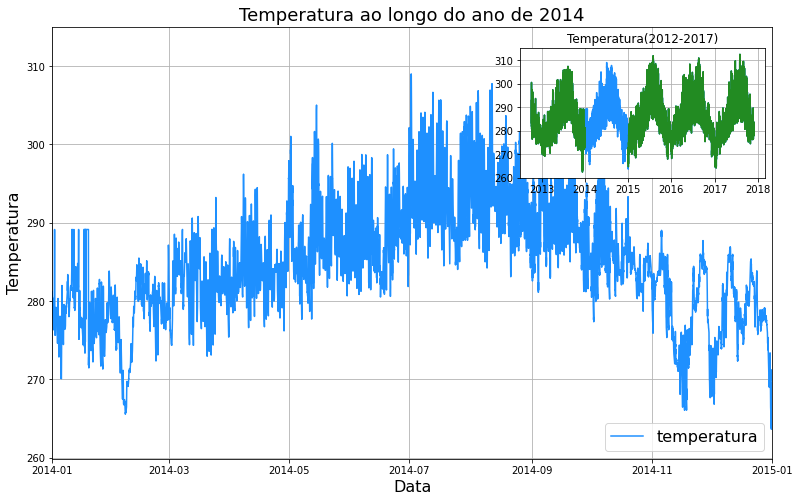

In [8]:
fig = plt.figure(figsize=(10, 6))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.65, 0.65, 0.34, 0.30])

eixo.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo.set_title('Temperatura ao longo do ano de 2014', fontsize=18)
eixo.set_xlim(datetime(2014, 1, 1), datetime(2015, 1, 1))
eixo.set_ylabel('Temperatura', fontsize=16)
eixo.set_xlabel('Data', fontsize=16)
eixo.legend(['temperatura'], loc='lower right', fontsize=16)
eixo.grid(True)

esquerda = df['data'] < datetime(2014,1, 1)
direita = df['data'] > datetime(2015,1,1)


eixo2.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo2.plot(df[esquerda]['data'], df[esquerda]['temperatura'], color='forestgreen')
eixo2.plot(df[direita]['data'], df[direita]['temperatura'], color='forestgreen')
eixo2.set_title('Temperatura(2012-2017)')
eixo2.grid(True)

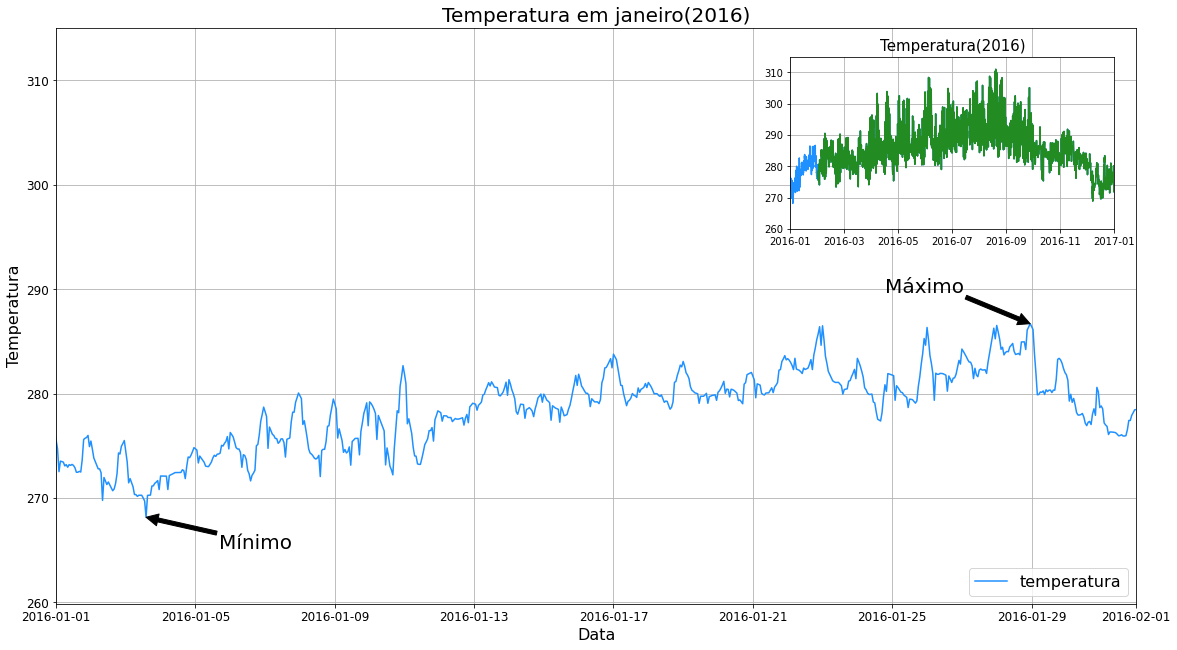

In [10]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.68, 0.65, 0.30, 0.30])

# gréfico 1
eixo.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo.set_title('Temperatura em janeiro(2016)', fontsize=20)
eixo.set_xlim(datetime(2016, 1, 1), datetime(2016, 2, 1))
eixo.set_ylabel('Temperatura', fontsize=16)
eixo.set_xlabel('Data', fontsize=16)
eixo.legend(['temperatura'], loc='lower right', fontsize=16)
eixo.tick_params(labelsize=12)
eixo.grid(True)

# dataframe com intervalo específico
janeiro2016 = df[(df['data'] > datetime(2016, 1, 1)) & (df['data'] < datetime(2016, 2, 1))]

# criando a anotação de máximo
x1 = janeiro2016['data'][janeiro2016['temperatura'].idxmax()]
y1 = max(janeiro2016['temperatura'])
x2 = janeiro2016['data'][janeiro2016['temperatura'].idxmax()-100]
y2 = max(janeiro2016['temperatura']) + 3
eixo.annotate('Máximo', xy=(x1, y1), xytext=(x2, y2),fontsize=20,
             arrowprops=dict(facecolor='k'))

# criando a anotação de mínimo
a1 = janeiro2016['data'][janeiro2016['temperatura'].idxmin()]
b1 = min(janeiro2016['temperatura'])
a2 = janeiro2016['data'][janeiro2016['temperatura'].idxmin()+50]
b2 = min(janeiro2016['temperatura']) - 3
eixo.annotate('Mínimo', xy=(a1, b1), xytext=(a2, b2),fontsize=20,
             arrowprops=dict(facecolor='k'))

# criando a marcação do lado direito do gráfico 2
direita = df['data'] > datetime(2016,2,1)

# gráfico 2
eixo2.plot(df['data'], df['temperatura'], color='dodgerblue')
eixo2.plot(df[direita]['data'], df[direita]['temperatura'], color='forestgreen')
eixo2.set_xlim(datetime(2016, 1, 1), datetime(2017, 1, 1))
eixo2.set_title('Temperatura(2016)', fontsize=15)
eixo2.tick_params(labelsize=10)
eixo2.grid(True)

In [11]:
data = pd.read_csv('iris.csv')
data.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
renomear = {
    'comprimento_sépala':'comprimento_sepala',
    'largura_sépala':'largura_sepala',
    'comprimento_pétala':'comprimento_petala',
    'largura_pétala':'largura_petala',
    'espécie':'especie'
}

data.rename(mapper=renomear, axis=1, inplace=True)

In [15]:
data['especie'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

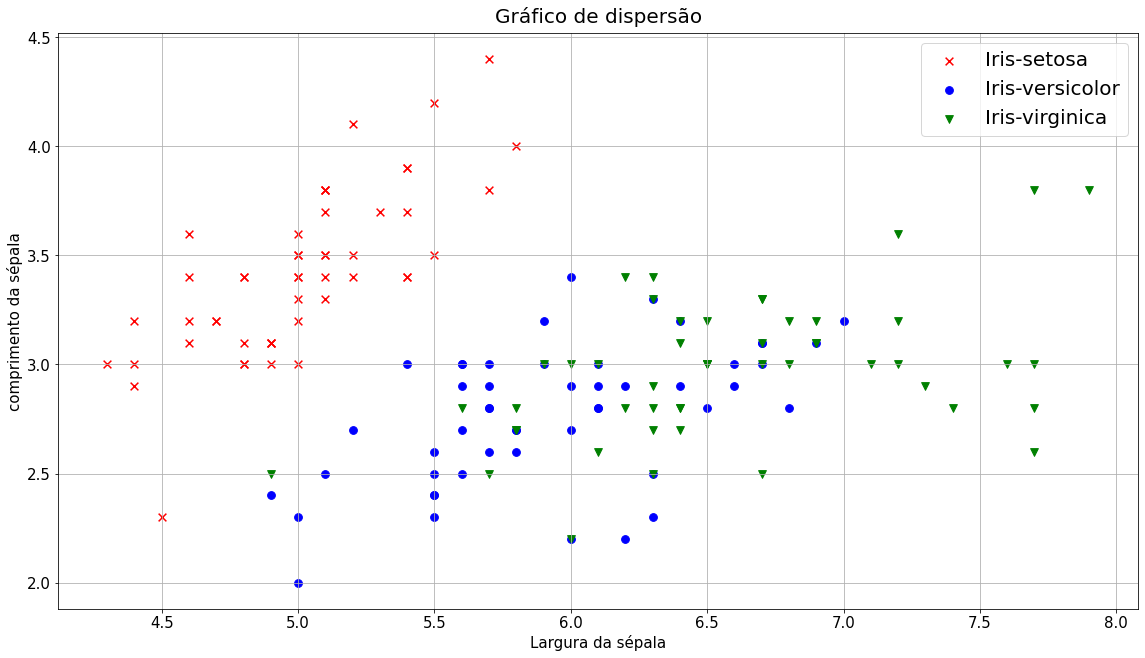

In [32]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'g'}
marcadores = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'v'}

for especie in data['especie'].unique():
    _ = data[data['especie'] == especie]
    eixo.scatter(_['comprimento_sepala'], _['largura_sepala'], color=cores[especie],
                marker=marcadores[especie], s=60)
    
eixo.set_title('Gráfico de dispersão', fontsize=20, pad=10)
eixo.set_ylabel('comprimento da sépala', fontsize=15)
eixo.set_xlabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)
eixo.grid(True)

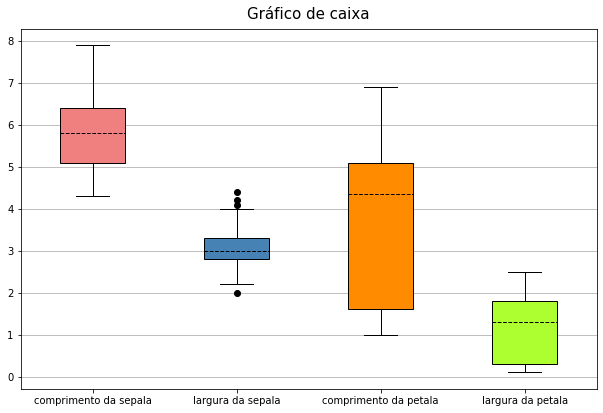

In [50]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['lightcoral', 'steelblue', 'darkorange', 'greenyellow']
labels = ['comprimento da sepala', 'largura da sepala', 'comprimento da petala',
         'largura da petala']

caixas = eixo.boxplot(data.drop(labels='especie', axis=1), patch_artist=True,
                     medianprops=dict(color='k', linestyle='--'),
                     flierprops=dict(markerfacecolor='k', marker='o'))
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(data.drop(labels='especie', axis=1).columns)
eixo.grid(visible=True, axis='y')
eixo.set_xticklabels(labels)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor, edgecolor='k')

Text(3.8586666666666694, 31, 'mediana')

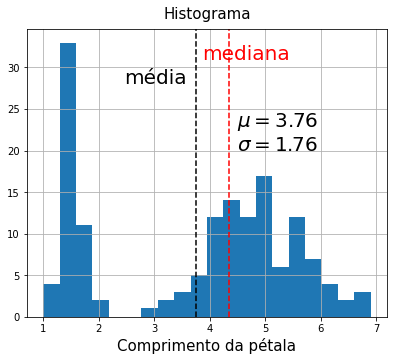

In [52]:
fig = plt.figure(figsize=(5, 4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = data['comprimento_petala'].mean(), data['comprimento_petala'].std()

eixo.hist(data['comprimento_petala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate("$\mu={0:.2f}$\n$\sigma={1:.2f}$".format(mu, sigma),
             xy=(4.5, 20), fontsize=20)

eixo.axvline(mu, color='k', linestyle='--')
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20)

mediana = data['comprimento_petala'].median()
eixo.axvline(mediana, color='r', linestyle='--')
eixo.annotate('mediana', xy=(mu+0.1, 31), fontsize=20, color='r')